In [27]:
from futures_tools import *

In [28]:
#keys location:
file_name = 'keys.json'
folder_name = 'keys'
json_path = read_folder_file(folder_name, file_name)

#pg credentials
pg_service_name = "pgcurrencies"
credentials = get_credentials(pg_service_name,json_path)

#binance futures credentials
binance_service_name = "FuturesTestnet"
keys = get_credentials(binance_service_name,json_path)
api_key = keys['api_key']
api_secret = keys['api_secret']

###########################################
########### CONNECTIONS ###################
###########################################

# pgsql connection
conn = psycopg2.connect(
    host=credentials['hostname'],
    database=credentials['database'],
    port=credentials['port'],
    user=credentials['username'],
    password=credentials['password']
)
cursor = conn.cursor()

# Binance client connection
client = Client(api_key, api_secret,testnet=True)


In [3]:
# Ejemplo: Obtener el balance de futuros
futures_balance = client.futures_account_balance()
print("Balance de Futuros:")
for balance in futures_balance:
    print(balance)


Balance de Futuros:
{'accountAlias': 'fWFzsRSgTiXqfW', 'asset': 'FDUSD', 'balance': '0.00000000', 'crossWalletBalance': '0.00000000', 'crossUnPnl': '0.00000000', 'availableBalance': '0.00000000', 'maxWithdrawAmount': '0.00000000', 'marginAvailable': True, 'updateTime': 0}
{'accountAlias': 'fWFzsRSgTiXqfW', 'asset': 'BNB', 'balance': '0.00000000', 'crossWalletBalance': '0.00000000', 'crossUnPnl': '0.00000000', 'availableBalance': '0.00000000', 'maxWithdrawAmount': '0.00000000', 'marginAvailable': True, 'updateTime': 0}
{'accountAlias': 'fWFzsRSgTiXqfW', 'asset': 'ETH', 'balance': '0.00000000', 'crossWalletBalance': '0.00000000', 'crossUnPnl': '0.00000000', 'availableBalance': '0.00000000', 'maxWithdrawAmount': '0.00000000', 'marginAvailable': True, 'updateTime': 0}
{'accountAlias': 'fWFzsRSgTiXqfW', 'asset': 'BTC', 'balance': '0.00000000', 'crossWalletBalance': '0.00000000', 'crossUnPnl': '0.00000000', 'availableBalance': '0.00000000', 'maxWithdrawAmount': '0.00000000', 'marginAvailable

In [21]:
def api_to_df(klines,columns):
    df = pd.DataFrame(klines, columns=columns)

    # Format data
    df['Open Time'] = pd.to_datetime(df['Open Time'], unit='ms')
    df['Close Time'] = pd.to_datetime(df['Close Time'], unit='ms')
    df['Open'] = df['Open'].astype(float)
    df['High'] = df['High'].astype(float)
    df['Low'] = df['Low'].astype(float)
    df['Close'] = df['Close'].astype(float)
    df['Volume'] = df['Volume'].astype(float)
    df['Quote Asset Volume'] = df['Quote Asset Volume'].astype(float)
    df['Number of Trades'] = df['Number of Trades'].astype(int)
    df['Taker Buy Base Volume'] = df['Taker Buy Base Volume'].astype(float)
    df['Taker Buy Quote Volume'] = df['Taker Buy Quote Volume'].astype(float)
    df['Ignore'] = df['Ignore'].astype(int)
    return df

def get_historic_candles(symbol: str,start_date: str,end_date: str,interval: str, client)-> pd.DataFrame:

    klines = client.get_historical_klines(symbol, interval, start_date,end_date)
    columns = ['Open Time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close Time',
            'Quote Asset Volume', 'Number of Trades', 'Taker Buy Base Volume', 'Taker Buy Quote Volume', 'Ignore']
    df = api_to_df(klines,columns)
    return df


In [26]:
columns = ['Open Time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close Time',
        'Quote Asset Volume', 'Number of Trades', 'Taker Buy Base Volume', 'Taker Buy Quote Volume', 'Ignore']
klines = client.get_historical_klines("BTCUSDT", Client.KLINE_INTERVAL_1WEEK, "1 Jan, 2017")
df = api_to_df(klines,columns)
df

/tmp/ipykernel_69585/2761133647.py:3: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines("BTCUSDT", Client.KLINE_INTERVAL_1WEEK, "1 Jan, 2017")


,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,Taker Buy Base Volume,Taker Buy Quote Volume,Ignore
0,2025-01-06,95436.52,107500.0,4429.82,94525.01,1318.57885,2025-01-12 23:59:59.999,1.086232e+08,418346,697.33063,6.335194e+07,0
1,2025-01-13,94525.01,107307.0,22499.00,107307.00,1434.94299,2025-01-19 23:59:59.999,1.313674e+08,521769,754.25715,7.390354e+07,0
2,2025-01-20,101608.23,112350.3,21160.00,105172.73,1745.01502,2025-01-26 23:59:59.999,1.739840e+08,723358,892.47645,9.343870e+07,0


In [23]:
get_historic_candles("BTCUSDT",'2025-01-07','2025-01-09',Client.KLINE_INTERVAL_5MINUTE, client)

/tmp/ipykernel_69585/1981113560.py:21: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(symbol, interval, start_date,end_date)


,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,Taker Buy Base Volume,Taker Buy Quote Volume,Ignore
0,2025-01-08 14:25:00,95436.52,95436.52,21250.00,21250.00,0.00106,2025-01-08 14:29:59.999,26.976191,2,0.00000,0.000000,0
1,2025-01-08 14:30:00,94000.00,107500.00,20917.00,75116.60,0.72536,2025-01-08 14:34:59.999,44859.742409,252,0.23009,21773.598363,0
2,2025-01-08 14:35:00,75116.60,78244.92,22088.00,78244.92,0.70664,2025-01-08 14:39:59.999,43839.491086,377,0.20423,15753.499555,0
3,2025-01-08 14:40:00,71750.00,73082.98,23648.00,67573.16,0.26799,2025-01-08 14:44:59.999,11110.562377,227,0.06168,4214.307712,0
4,2025-01-08 14:45:00,66750.00,84720.95,11901.28,67233.25,1.17853,2025-01-08 14:49:59.999,46446.956403,325,0.32697,22708.727331,0
...,...,...,...,...,...,...,...,...,...,...,...,...
111,2025-01-08 23:40:00,95020.06,95054.89,94452.90,95028.47,0.30577,2025-01-08 23:44:59.999,29054.420752,180,0.11450,10880.564472,0
112,2025-01-08 23:45:00,95028.48,95128.96,21250.00,94925.42,0.21954,2025-01-08 23:49:59.999,20771.504162,119,0.09807,9314.907363,0
113,2025-01-08 23:50:00,94925.42,95059.88,94911.61,95030.30,0.33197,2025-01-08 23:54:59.999,31533.119501,172,0.28050,26646.264241,0
114,2025-01-08 23:55:00,95027.35,95062.81,95005.23,95062.81,0.50772,2025-01-08 23:59:59.999,48252.491892,254,0.31545,29979.723251,0


In [11]:

# Parámetros de la operación
symbol = "BTCUSDT"  # Par de trading
quantity = 0.005    # Cantidad en BTC
entry_price = 106530 # Precio de entrada (puede ser None para una orden de mercado)
stop_loss_price = 102530  # Precio de Stop Loss
take_profit_price = 116530  # Precio de Take Profit
leverageX = 10

try:
    client.futures_change_leverage(symbol="BTCUSDT", leverage=leverageX)
    # Crear orden de compra de mercado (o límite si defines un precio de entrada)
    order = client.futures_create_order(
        symbol=symbol,
        side=SIDE_BUY,
        type=ORDER_TYPE_MARKET,  # Cambia a ORDER_TYPE_LIMIT si quieres usar un precio específico
        quantity=quantity
    )
    print("Orden principal creada:", order)

    # Crear orden Stop Loss
    stop_loss_order = client.futures_create_order(
        symbol=symbol,
        side=SIDE_SELL,  # Venta para cerrar la posición
        type=STOP_MARKET,
        quantity=quantity,
        stopPrice=stop_loss_price
    )
    print("Orden Stop Loss creada:", stop_loss_order)

    # Crear orden Take Profit
    take_profit_order = client.futures_create_order(
        symbol=symbol,
        side=SIDE_SELL,  # Venta para cerrar la posición
        type=TAKE_PROFIT_MARKET,
        quantity=quantity,
        stopPrice=take_profit_price
    )
    print("Orden Take Profit creada:", take_profit_order)

except Exception as e:
    print(f"Error al crear órdenes: {e}")

Error al crear órdenes: name 'STOP_MARKET' is not defined


In [12]:
# Posiciones de compra abiertas
positions = client.futures_position_information(symbol='BTCUSDT')
positions

[{'symbol': 'BTCUSDT',
  'positionSide': 'BOTH',
  'positionAmt': '0.005',
  'entryPrice': '106632.8',
  'breakEvenPrice': '106675.45312',
  'markPrice': '105531.29755556',
  'unRealizedProfit': '-5.50751222',
  'liquidationPrice': '0',
  'isolatedMargin': '0',
  'notional': '527.65648777',
  'marginAsset': 'USDT',
  'isolatedWallet': '0',
  'initialMargin': '52.76564877',
  'maintMargin': '2.11062595',
  'positionInitialMargin': '52.76564877',
  'openOrderInitialMargin': '0',
  'adl': 1,
  'bidNotional': '0',
  'askNotional': '0',
  'updateTime': 1737797146242}]

In [10]:
#Posiciones de venta en cola
open_orders = client.futures_get_open_orders(symbol='BTCUSDT')
open_orders

[{'orderId': 4081978275,
  'symbol': 'BTCUSDT',
  'status': 'NEW',
  'clientOrderId': 'web_yzV7Ex9ngWNczJKJ52Sh',
  'price': '0',
  'avgPrice': '0',
  'origQty': '0',
  'executedQty': '0',
  'cumQuote': '0.00000',
  'timeInForce': 'GTE_GTC',
  'type': 'STOP_MARKET',
  'reduceOnly': True,
  'closePosition': True,
  'side': 'SELL',
  'positionSide': 'BOTH',
  'stopPrice': '99563',
  'workingType': 'MARK_PRICE',
  'priceProtect': True,
  'origType': 'STOP_MARKET',
  'priceMatch': 'NONE',
  'selfTradePreventionMode': 'EXPIRE_MAKER',
  'goodTillDate': 0,
  'time': 1737798768509,
  'updateTime': 1737798768509},
 {'orderId': 4081978273,
  'symbol': 'BTCUSDT',
  'status': 'NEW',
  'clientOrderId': 'web_ZthZFEGII7g50I2CNR1w',
  'price': '0',
  'avgPrice': '0',
  'origQty': '0',
  'executedQty': '0',
  'cumQuote': '0.00000',
  'timeInForce': 'GTE_GTC',
  'type': 'TAKE_PROFIT_MARKET',
  'reduceOnly': True,
  'closePosition': True,
  'side': 'SELL',
  'positionSide': 'BOTH',
  'stopPrice': '109000

In [29]:
type(client)


binance.client.Client

In [31]:
# Configuración de las velas
symbol = 'BTCUSDT'  # Par de trading
interval = Client.KLINE_INTERVAL_5MINUTE  # Intervalo de tiempo (5 minutos)
limit = 1500  # Número de velas a recuperar

def get_last_candles(symbol: str,limit: int,interval: str, client)-> pd.DataFrame:

    klines = client.futures_klines(symbol=symbol, interval=interval, limit=limit)

    # Convertir a un DataFrame para visualizar mejor
    columns = ['Open Time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close Time',
            'Quote Asset Volume', 'Number of Trades', 'Taker Buy Base Volume', 'Taker Buy Quote Volume', 'Ignore']

    df = pd.DataFrame(klines, columns=columns)

    # Convertir datos a los tipos correctos
    df['Open Time'] = pd.to_datetime(df['Open Time'], unit='ms')
    df['Close Time'] = pd.to_datetime(df['Close Time'], unit='ms')
    df['Open'] = df['Open'].astype(float)
    df['High'] = df['High'].astype(float)
    df['Low'] = df['Low'].astype(float)
    df['Close'] = df['Close'].astype(float)
    df['Volume'] = df['Volume'].astype(float)
    df['Quote Asset Volume'] = df['Quote Asset Volume'].astype(float)
    df['Number of Trades'] = df['Number of Trades'].astype(int)
    df['Taker Buy Base Volume'] = df['Taker Buy Base Volume'].astype(float)
    df['Taker Buy Quote Volume'] = df['Taker Buy Quote Volume'].astype(float)
    df['Ignore'] = df['Ignore'].astype(int)

    return df

get_last_candles(symbol,limit,interval,client)

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,Taker Buy Base Volume,Taker Buy Quote Volume,Ignore
0,2025-01-20 18:20:00,102357.7,104000.0,100530.9,103357.8,13.927,2025-01-20 18:24:59.999,1.428004e+06,431,6.367,658199.0030,0
1,2025-01-20 18:25:00,103999.9,104000.0,101200.7,103000.0,6.329,2025-01-20 18:29:59.999,6.539809e+05,233,4.339,450157.8358,0
2,2025-01-20 18:30:00,103094.9,104000.0,100530.9,102807.2,13.447,2025-01-20 18:34:59.999,1.379266e+06,386,6.931,716631.4225,0
3,2025-01-20 18:35:00,103000.0,104000.0,102000.0,102844.2,16.404,2025-01-20 18:39:59.999,1.698294e+06,221,6.930,719982.8484,0
4,2025-01-20 18:40:00,102572.2,104000.0,100927.2,103342.7,16.183,2025-01-20 18:44:59.999,1.664702e+06,481,7.948,824296.0603,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,2025-01-25 22:55:00,104120.0,105000.0,102286.5,103000.1,6.780,2025-01-25 22:59:59.999,6.999649e+05,184,1.663,173076.3629,0
1496,2025-01-25 23:00:00,103135.3,103652.3,102231.0,103000.2,1.823,2025-01-25 23:04:59.999,1.878085e+05,83,0.425,43915.3468,0
1497,2025-01-25 23:05:00,103440.0,104500.0,101980.0,103364.7,14.738,2025-01-25 23:09:59.999,1.517691e+06,366,4.053,417646.5567,0
1498,2025-01-25 23:10:00,103669.6,105000.0,101692.5,103500.0,24.999,2025-01-25 23:14:59.999,2.579825e+06,469,8.988,940428.1687,0


In [24]:
df.dtypes

Open Time                 datetime64[ns]
Open                             float64
High                             float64
Low                              float64
Close                            float64
Volume                           float64
Close Time                datetime64[ns]
Quote Asset Volume               float64
Number of Trades                   int64
Taker Buy Base Volume            float64
Taker Buy Quote Volume           float64
Ignore                             int64
dtype: object

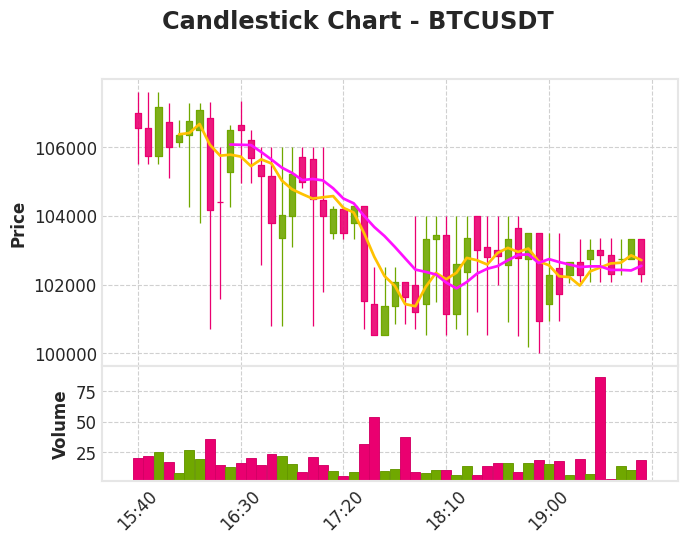

In [16]:
total_candles = 50
candles = df.copy(deep=True)[:total_candles]


# Configurar índice de tiempo para mplfinance
candles.set_index('Open Time', inplace=True)

# Crear gráfico de velas
mpf.plot(candles, type='candle', volume=True, style='binance', title=f"Candlestick Chart - {symbol}",
         mav=(5, 10), show_nontrading=False)

In [12]:
total_candles = 100
candles = df.copy(deep=True)[:total_candles]
candles

,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,Taker Buy Base Volume,Taker Buy Quote Volume,Ignore
Open Time,,,,,,,,,,,
2025-01-20 15:35:00,106491.2,107604.5,105504.5,107128.3,28.745,2025-01-20 15:39:59.999,3081329.76130,304,17.804,1909614.90340,0
2025-01-20 15:40:00,106999.7,107604.5,105504.5,106569.2,19.990,2025-01-20 15:44:59.999,2134345.47060,357,9.526,1021184.79530,0
2025-01-20 15:45:00,106545.0,107604.5,105504.5,105755.1,21.689,2025-01-20 15:49:59.999,2301333.52590,364,10.471,1114219.93160,0
2025-01-20 15:50:00,105755.1,107604.5,105500.0,107182.8,24.953,2025-01-20 15:54:59.999,2653406.55290,514,9.071,970528.13830,0
2025-01-20 15:55:00,106721.2,107300.0,105114.2,106002.7,17.007,2025-01-20 15:59:59.999,1808856.19890,392,7.074,753837.25470,0
...,...,...,...,...,...,...,...,...,...,...,...
2025-01-20 23:30:00,103342.4,103342.5,102200.0,103342.4,5.099,2025-01-20 23:34:59.999,525819.21300,108,2.767,285936.53400,0
2025-01-20 23:35:00,103342.4,103342.5,102963.0,102963.0,3.557,2025-01-20 23:39:59.999,366772.12790,42,0.420,43403.84520,0
2025-01-20 23:40:00,103342.4,103342.5,101101.0,101736.1,5.700,2025-01-20 23:44:59.999,584523.83310,119,3.193,329510.56690,0
